# PRIMER EXAMEN DE PROGRAMACIÓN LINEAL

# Pregunta 1
Resuelve el siguiente problema (cualquier método):
   \begin{equation*}
   \begin{aligned}
   \text{Maximizar} \quad & x+2y\\
   \text{sujeto a} \quad &
     \begin{aligned}
      x &\geq  0\\
      y &\geq 0\\
      2x+y &\leq 2
     \end{aligned}
   \end{aligned}
   \end{equation*}

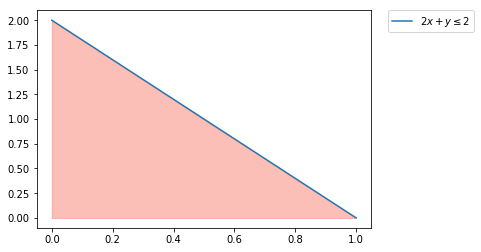

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 1, 2000)
y = 2- 2*x

plt.plot(x, y, label=r'$2x+y\leq2$')
y1 = np.minimum(x, y)
plt.fill_between(x, y, where=y>=0, color='salmon', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
from pulp import *
x = LpVariable("x", 0 )
y = LpVariable("y", 0 )

In [19]:
prob = LpProblem("pregunta 1", LpMaximize)
prob += 2*x + y <= 2

In [20]:
prob += x +2*y

In [21]:
prob

pregunta 1:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
_C1: 2 x + y <= 2

VARIABLES
x Continuous
y Continuous

In [22]:
status = prob.solve()
value(x), value(y), value(prob.objective)

(0.0, 2.0, 4.0)

# Pregunta 2

2. Resuelve el siguiente problema (cualquier método):
   \begin{equation*}
    \begin{aligned}
   \text{Maximizar} \quad & x_{1}+2x_{2}\\
   \text{sujeto a} \quad &
     \begin{aligned}
      3x_{1}+4x_{2} &\leq 12\\
      x_{1}-x_{2} &\leq 2\\
      -2x_{1}+x_{2} &\leq 2\\
       x_{1} &\geq 0\\
       x_{2} &\geq 0
     \end{aligned}
   \end{aligned}
   \end{equation*}
   

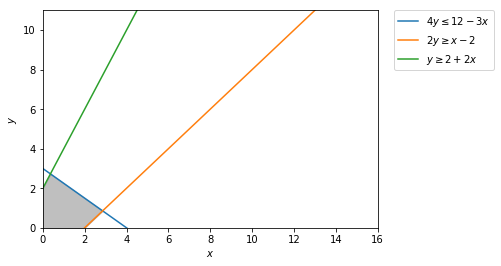

In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y <=  (12-3x)/4
y1 = (12-3*x)/4.0
# y >= -2 + x
y2 = -2 +x
# y >=2 + 2x
y3 = 2+ 2*x
# Make plot
plt.plot(x, y1, label=r'$4y\leq12-3x$')
plt.plot(x, y2, label=r'$2y\geq x-2$')
plt.plot(x, y3, label=r'$y\geq 2+2x$')

plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y1, y2)
y6 = np.minimum(y1, y3)
plt.fill_between(x, y5, y6, where=y5<y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



In [44]:
x1 = LpVariable("x1", 0 )
x2 = LpVariable("x2", 0 )
prob = LpProblem("pregunta 2", LpMaximize)
prob += 3*x1 + 4*x2 <= 12
prob += x1-x2 <=2
prob += -2*x1+x2 <= 2

In [24]:
prob += x1+2*x2

In [25]:
prob

pregunta 2:
MAXIMIZE
1*x1 + 2*x2 + 0
SUBJECT TO
_C1: 3 x1 + 4 x2 <= 12

_C2: x1 - x2 <= 2

_C3: - 2 x1 + x2 <= 2

VARIABLES
x1 Continuous
x2 Continuous

In [26]:
status = prob.solve()
value(x1), value(x2), value(prob.objective)

(0.36363636, 2.7272727, 5.81818176)

# Pregunta 3

3. Resuelve el siguiente problema (cualquier método):
   \begin{equation*}
   \begin{aligned}
   \text{Maximizar} \quad & 4x_{1}+x_{2}+3x_{3}\\
   \text{sujeto a} \quad &
     \begin{aligned}
      x_{1} & \leq 3\\
      x_{2} &\leq 5\\
      x_{3} &\leq 2\\
      x_{1}+x_{2}+2x_{3} &\leq 10\\
      x_{1},x_{2},x_{3} &\geq 0
     \end{aligned}
   \end{aligned}
   \end{equation*}

In [27]:
x1 = LpVariable("x1", 0 , 3)
x2 = LpVariable("x2", 0 , 5)
x3 = LpVariable("x3", 0 , 2)
prob = LpProblem("pregunta 3", LpMaximize)
prob += x1 + x2 +2*x3 <= 10


In [28]:
prob += 4*x1+x2+ 3*x3

In [29]:
prob

pregunta 3:
MAXIMIZE
4*x1 + 1*x2 + 3*x3 + 0
SUBJECT TO
_C1: x1 + x2 + 2 x3 <= 10

VARIABLES
x1 <= 3 Continuous
x2 <= 5 Continuous
x3 <= 2 Continuous

In [30]:
status = prob.solve()
value(x1), value(x2), value(x3), value(prob.objective)

(3.0, 3.0, 2.0, 21.0)

# Pregunta 4

Un gerente está planeando cómo distribuir la producción de tres
   productos entre dos máquinas. Para ser manufacturado cada producto
   requiere cierto tiempo (en horas) en cada una de las máquinas.

   El tiempo requerido está resumido en la siguiente tabla:

| Producto/Maquina  | Maquina 1  | Maquina 2  |
|------------------:|-----------:|-----------:|
| A                 | 1          | 1          |
| B                 | 2          | 1          |
| C                 | 2          | 2          | 

   La máquina 1 está disponible 40 horas a la semana y la 2 está
   disponible 34 horas a la semana.

   Si la utilidad obtenida al vender los productos A, B y C es de 2, 3
   y 5 pesos por unidad, respectivamente, ¿cuál debe ser la producción
   semanal que maximiza la utilidad? ¿Cuál es la utilidad máxima?

Sea a el numero de productos de A
Sea b el numero de productos de B
Sea c el numero de productos de C

In [38]:
a = LpVariable("a", 0 )
b = LpVariable("b", 0 )
c = LpVariable("c", 0 )
prob = LpProblem("pregunta 4", LpMaximize)
prob += a + 2*b +2*c <= 40
prob += a + b +2*c <=34
prob += 2*a+3*b+5*c

In [33]:
prob


pregunta 4:
MAXIMIZE
2*a + 3*b + 5*c + 0
SUBJECT TO
_C1: a + 2 b + 2 c <= 40

_C2: a + b + 2 c <= 34

VARIABLES
a Continuous
b Continuous
c Continuous

In [34]:
status=prob.solve()
value(a),value(b),value(c), value(prob.objective)

(0.0, 6.0, 14.0, 88.0)

# Problema 5

 Demuestra que el conjunto $\{(x,y)\mid x\geq 0\}\subseteq
   \mathbb{R}^{2}$ es convexo.

Sabemos que un conjunto $A$ es convexo si para cada $x,y\in A$ se cumple que $tx+(1-t)y\in A$ con $t\in[0,1]$
Así que vamos a considerar $x_0,y_0 \in \{(x,y)\mid x\geq 0\}$ y $x_0=(a,b)$ y $y_0=(c,d)$

Luego, consideramos también $t(a,b)+(1-t)(c,d)=(ta+(1-t)c, tb+(1-t)d)$

Queremos ver que $ ta+(1-t)c \geq 0$, lo cual es cierto, pues $t \geq0$ y $a \geq0$ entonces $ta\geq0$

Además como $1-t\geq0$ y $c\geq0$ entonces $(1-t)c \geq 0$  

Finalmente, $ta+(1-t)c \geq 0$, por lo tanto el conjunto sí es convexo. 

# Problema 6

Demuestra que la intersección de dos conjuntos convexos es convexo.

Sean $X,Y$ dos conjuntos convexos 


1) Si $X\cap Y= \emptyset $, se sabe que el vacío es convexo, pues si no lo fuera existirían $x_0,y_0 \in \emptyset$!!! , por lo que la intersección sí es convexa.

2) Si  $X\cap Y \neq \emptyset $, entonces existe al menos un elemento en la intersección.

a) Si sólo hay un único elemento, se cumple que la intercección es convexa, pues por definición de convexo dada al incio del problema 5, hacemos $x=y$ y se sigue el resultado. 

b) Si hay más, consideramos $x,y \in X \cap Y$, es decir
$x,y \in X$, como X es convexo, entonces se sigue que $tx+(1-t)y \in X$ para $t \in [0,1]$


Además, $x,y \in Y$, como y es convexo, se sigue que  $tx+(1−t)y \in Y$ para $t \in [0,1]$  

De lo anterior, se sigue que  $tx+(1−t)y \in X \cap Y$

Es decir, la intersección es convexa.